# Quickstart

In [3]:
import genseq
import opr
import noise


## Créer une séquence
T, V, H = 50, 50, 50
sigmas = (0.1, 0.1, 0.1, 0.3, 0.3, 0.3, 0.5)
mus = (0,)*7
my_seq = genseq.genseq_3dnoise_seq(T, V, H, sigmas, mus)
# pour récupéer 


# Génération de séquence

Générer chaque type de séquence de bruits, ou toutes les séquences d'un coup.

In [1]:
import genseq
import numpy as np

T, V, H = 20, 20, 20

mu = 3
sigma = 1

mu_t = mu
mu_v = mu
mu_h = mu
mu_tv = mu
mu_th = mu
mu_vh = mu
mu_tvh = mu

sigma_t = sigma
sigma_v = sigma
sigma_h = sigma
sigma_tv = sigma
sigma_th = sigma
sigma_vh = sigma
sigma_tvh = sigma

mus = mu_t, mu_v, mu_h, mu_tv, mu_th, mu_vh, mu_tvh
sigmas = sigma_t, sigma_v, sigma_h, sigma_tv, sigma_th, sigma_vh, sigma_tvh

## Séquence par séquence

In [2]:
# METHODE 1
seq_nt = genseq.genseq_t(T, V, H, mu_t, sigma_t)
seq_nv = genseq.genseq_v(T, V, H, mu_v, sigma_v)
seq_nh = genseq.genseq_h(T, V, H, mu_h, sigma_h)
seq_ntv = genseq.genseq_tv(T, V, H, mu_tv, sigma_tv)
seq_nth = genseq.genseq_th(T, V, H, mu_th, sigma_th)
seq_nvh = genseq.genseq_vh(T, V, H, mu_vh, sigma_vh)
seq_ntvh = genseq.genseq_tvh(T, V, H, mu_tvh, sigma_tvh)

seq_tot = seq_nt + seq_nv + seq_nh + seq_ntv + seq_nth + seq_nvh + seq_ntvh

## Toutes les séquences d'un coup

In [3]:
####
all_seq = genseq.genseq_all_seq(T, V, H, sigmas, mus)

seq_tot_bis = all_seq[-1]


## Pour générer directement la séquence 3D totale

In [4]:
seq_3d_noise = genseq.genseq_3dnoise_seq(T, V, H, mus, sigmas)


# Opérateurs

## opérateurs de base

Dans opr, on a les 6 opérateurs de base

In [5]:
import opr

seq_dt = opr.dt(seq_3d_noise)
seq_dv = opr.dv(seq_3d_noise)
seq_dh = opr.dh(seq_3d_noise)

seq_idt = opr.idt(seq_3d_noise)
seq_idv = opr.idv(seq_3d_noise)
seq_idh = opr.idh(seq_3d_noise)


## opérateurs pour calculer les séquences de bruits

In [6]:
seq_ns = opr.n_s(seq_3d_noise) # moyenne
seq_nt = opr.n_t(seq_3d_noise)
seq_nv = opr.n_v(seq_3d_noise)
seq_nh = opr.n_h(seq_3d_noise)
seq_ntv = opr.n_tv(seq_3d_noise)
seq_nth = opr.n_th(seq_3d_noise)
seq_nvh = opr.n_vh(seq_3d_noise)
seq_ntvh = opr.n_tvh(seq_3d_noise) # bruit 3D

## OU
all_n_seq = opr.get_all_3d_noise_seq(seq_3d_noise)

## opérateurs pour calculer les séquences moyennes (approche matrice)

In [7]:
seq_dvdh = opr.n_dvdh(seq_3d_noise)
seq_dtdh = opr.n_dtdh(seq_3d_noise)
seq_dtdv = opr.n_dtdv(seq_3d_noise)
seq_dh = opr.n_dh(seq_3d_noise)
seq_dv = opr.n_dv(seq_3d_noise)
seq_dt = opr.n_dt(seq_3d_noise)
#seq_tot = seq_3d_noise

## OU
all_d_seq = opr.get_all_3D_mean_seq(seq_3d_noise)


# Noises

## Approche classique

In [8]:
import noise

var_seq_s = noise.var_s(seq_3d_noise)
var_seq_nt = noise.var_nt(seq_3d_noise)
var_seq_nv = noise.var_nv(seq_3d_noise)
var_seq_nh = noise.var_nh(seq_3d_noise)
var_seq_ntv = noise.var_ntv(seq_3d_noise)
var_seq_nth = noise.var_nth(seq_3d_noise)
var_seq_nvh = noise.var_nvh(seq_3d_noise)
var_seq_ntvh = noise.var_ntvh(seq_3d_noise)

## OU
all_var_seq = noise.get_all_3D_noise_var(seq_3d_noise)

## OU
all_var_seq_bis = noise.get_all_3d_noise_var_fast(seq_3d_noise)

## Approche matrice

### Calcul des variances des séquences moyénnées

In [9]:
var_seq_dt = noise.var_dt(seq_3d_noise)
var_seq_dv = noise.var_dv(seq_3d_noise)
var_seq_dh = noise.var_dt(seq_3d_noise)
var_seq_dtdv = noise.var_dtdv(seq_3d_noise)
var_seq_dtdh = noise.var_dtdh(seq_3d_noise)
var_seq_dvdh = noise.var_dvdh(seq_3d_noise)

## OU
all_var_mean_seq = noise.get_all_3d_mean_var(seq_3d_noise)


### Calcul des variances de bruit


In [10]:
all_classic_var_seq_matrix = noise.get_all_3d_classic_var_matrix(seq_3d_noise)

all_corrected_var_seq_matrix = noise.get_all_3d_corrected_var_matrix(seq_3d_noise)

## Impact du nombre d'échantillons et biais

### Pour un bruit aléatoire pur : $\sigma = \sigma_{tvh}$

In [61]:
V = H = 100
t_min = 30
t_max = 300

data = np.random.normal(mu, sigma, t_max*V*H)
data3d = data.reshape((t_max,V,H))

res_t = []
res_v = []
res_h = []
res_tv = []
res_th = []
res_vh = []
res_tvh = []
res_std = []
res_netd = []

echt = np.arange(t_min, t_max, 10)
for t in echt:
    data_t = data3d[:t]
    res_t.append(noise3d.get_sigma_T(data_t))
    res_v.append(noise3d.get_sigma_V(data_t))
    res_h.append(noise3d.get_sigma_H(data_t))
    res_tv.append(noise3d.get_sigma_TV(data_t))
    res_th.append(noise3d.get_sigma_TH(data_t))
    res_vh.append(noise3d.get_sigma_VH(data_t))
    res_tvh.append(noise3d.get_sigma_TVH(data_t))
    res_std.append(noise3d.get_sigma_tot(data_t))
    res_netd.append(noise3d.get_netd(data_t))
    
print("t : {}".format(res_t[-1]))
print("v : {}".format(res_v[-1]))
print("h : {}".format(res_h[-1]))
print("tv : {}".format(res_tv[-1]))
print("th : {}".format(res_th[-1]))
print("vh : {}".format(res_vh[-1]))
print("tvh : {}".format(res_tvh[-1]))
print("total : {}".format(noise3d.get_total(data3d)))

t : 0.01050892652780633
v : 0.005957220051000433
h : 0.007006639280100801
tv : 0.09882593667858844
th : 0.09958342268526352
vh : 0.05795322464395801
tvh : 0.9881726983965983
total : 0.9999062377487341


#### sur t, v et h

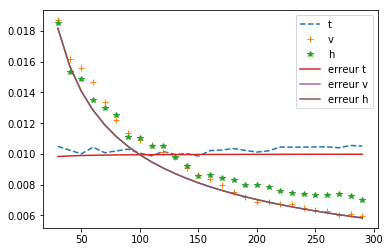

In [62]:
plt.plot(echt, np.array(res_t), "--", label="t")
plt.plot(echt, np.array(res_v), "+", label="v")
plt.plot(echt, np.array(res_h), "*", label="h")
plt.plot(echt, noise3d.coef_erreur_estimation_t(echt, V, H, sigma), label="erreur t")
plt.plot(echt, noise3d.coef_erreur_estimation_v(echt, V, H, sigma), label="erreur v")
plt.plot(echt, noise3d.coef_erreur_estimation_h(echt, V, H, sigma), label="erreur h")


plt.legend()

#### sur tv, th, vh

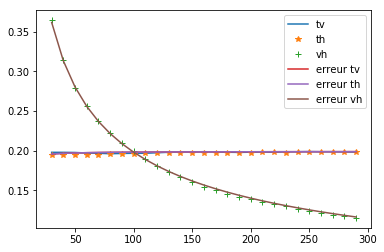

In [6]:
plt.plot(echt, np.array(res_tv), "-", label="tv")
plt.plot(echt, np.array(res_th), "*", label="th")
plt.plot(echt, np.array(res_vh), "+", label="vh")
plt.plot(echt, noise3d.coef_erreur_estimation_tv(echt, V, H, sigma), label="erreur tv")
plt.plot(echt, noise3d.coef_erreur_estimation_th(echt, V, H, sigma), label="erreur th")
plt.plot(echt, noise3d.coef_erreur_estimation_vh(echt, V, H, sigma), label="erreur vh")


plt.legend()

#### sur tvh

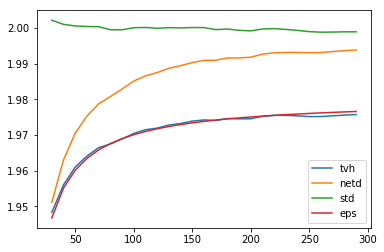

In [7]:

plt.plot(echt, np.array(res_tvh), label="tvh")
plt.plot(echt, np.array(res_netd), label="netd")
plt.plot(echt, np.array(res_std), label="std")

res_erreur_tvh = (noise3d.coef_erreur_estimation_tvh(echt, V, H, sigma))
plt.plot(echt, np.array(res_erreur_tvh), label="eps")

plt.legend()

### Pour un bruit purement spatial

In [77]:
V = H = 300
T = 300

data = np.random.normal(mu, sigma, V*H)
data2d = data.reshape((V,H))

data3d = np.repeat(data2d[np.newaxis, :, :], T, axis=0)
data3d.shape

(300, 300, 300)

In [78]:
res_t = []
res_v = []
res_h = []
res_tv = []
res_th = []
res_vh = []
res_tvh = []
res_std = []
res_netd = []


x_min = 30
x_max = 300

echvh = np.arange(x_min, x_max, 5)
for x in echvh:
    data_t = data3d[:, :x, :x]
    res_t.append(noise3d.get_sigma_T(data_t))
    res_v.append(noise3d.get_sigma_V(data_t))
    res_h.append(noise3d.get_sigma_H(data_t))
    res_tv.append(noise3d.get_sigma_TV(data_t))
    res_th.append(noise3d.get_sigma_TH(data_t))
    res_vh.append(noise3d.get_sigma_VH(data_t))
    res_tvh.append(noise3d.get_sigma_TVH(data_t))
    res_std.append(noise3d.get_sigma_tot(data_t))
    res_netd.append(noise3d.get_netd(data_t))

In [79]:
print("t : {}".format(res_t[-1]))
print("v : {}".format(res_v[-1]))
print("h : {}".format(res_h[-1]))
print("tv : {}".format(res_tv[-1]))
print("th : {}".format(res_th[-1]))
print("vh : {}".format(res_vh[-1]))
print("tvh : {}".format(res_tvh[-1]))
print("total : {}".format(noise3d.get_total(data3d)))

t : 1.5433182997536396e-33
v : 0.053999862471057286
h : 0.05980041779911619
tv : 2.3599416003099874e-16
th : 2.657274107702262e-16
vh : 0.995852350847307
tvh : 4.067405751608833e-15
total : 0.9992265238513647


#### sur t, v et h

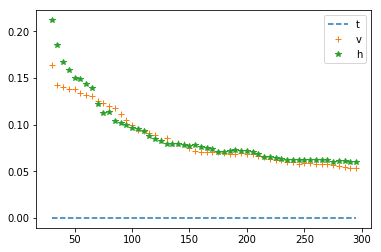

In [80]:
plt.plot(echvh, np.array(res_t), "--", label="t")
plt.plot(echvh, np.array(res_v), "+", label="v")
plt.plot(echvh, np.array(res_h), "*", label="h")


plt.legend()

#### sur tv, th, vh

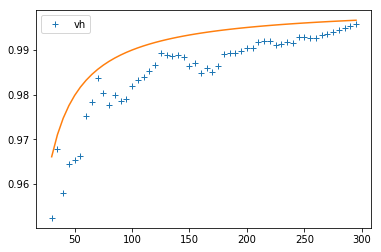

In [87]:
#plt.plot(echvh, np.array(res_tv), "-", label="tv")
#plt.plot(echvh, np.array(res_th), "*", label="th")
plt.plot(echvh, np.array(res_vh), "+", label="vh")
plt.plot(echvh, sigma*np.sqrt(((1-2/echvh))))
plt.legend()

#### sur tvh

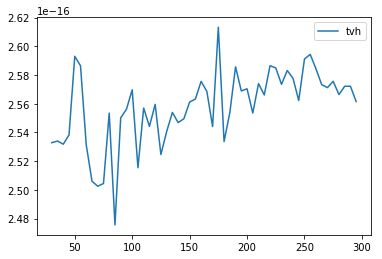

In [76]:

plt.plot(echvh, np.array(res_tvh), label="tvh")
plt.legend()

In [38]:
0.3**2

0.09

In [ ]:
L’espérance d’une espérance d’un scalaire est égal à l’esperance de ce scalaire.
 
# -*- coding: utf-8 -*-
 
import numpy as np
 
mu = 1
val_sigma_tvh = 1
val_sigma_tv = 1
val_sigma_t = 0.5
val_sigma = np.sqrt(val_sigma_tvh**2 + val_sigma_t**2 + val_sigma_tv**2)
 
V = 50
H = 50
 
t_min = 500
t_max = 2000
decht = 300
ech_t = np.arange(t_min, t_max, decht)
 
 
def dv(seq):
    return np.mean(seq, axis=1, keepdims=True)
def dt(seq):
    return np.mean(seq, axis=0, keepdims=True)
def dh(seq):
    return np.mean(seq, axis=2, keepdims=True)
def idv(seq):
    return seq - dv(seq)
def idt(seq):
    return seq - dt(seq)
def idh(seq):
    return seq - dh(seq)
 
 
def opr_s(seq):
    return dt(dv(dh(seq)))
def opr_t(seq):
    return dv(dh(idt(seq)))
def opr_v(seq):
    return (dt(dh(idv(seq))))
def opr_h(seq):
    return (dv(dt(idh(seq))))
def opr_tv(seq):
    return dh(idt(idv(seq)))
def opr_th(seq):
    return dv(idt(idh(seq)))
def opr_vh(seq):
    return dt(idv(idh(seq)))
def opr_tvh(seq):
    return idt(idv(idh(seq)))
 
ddof = 0
 
 

 
 

 
nb_matrix = 20
 
res_var_s = np.zeros((nb_matrix, len(ech_t)), dtype=np.float64)
res_var_t = np.zeros((nb_matrix, len(ech_t)), dtype=np.float64)
res_var_v = np.zeros((nb_matrix, len(ech_t)), dtype=np.float64)
res_var_h = np.zeros((nb_matrix, len(ech_t)), dtype=np.float64)
res_var_tv = np.zeros((nb_matrix, len(ech_t)), dtype=np.float64)
res_var_th = np.zeros((nb_matrix, len(ech_t)), dtype=np.float64)
res_var_vh = np.zeros((nb_matrix, len(ech_t)), dtype=np.float64)
res_var_tvh = np.zeros((nb_matrix, len(ech_t)), dtype=np.float64)
 
res_var_UBO_t = np.zeros((nb_matrix, len(ech_t)), dtype=np.float64)
res_var_UBO_v = np.zeros((nb_matrix, len(ech_t)), dtype=np.float64)
res_var_UBO_h = np.zeros((nb_matrix, len(ech_t)), dtype=np.float64)
res_var_UBO_tv = np.zeros((nb_matrix, len(ech_t)), dtype=np.float64)
res_var_UBO_th = np.zeros((nb_matrix, len(ech_t)), dtype=np.float64)
res_var_UBO_vh = np.zeros((nb_matrix, len(ech_t)), dtype=np.float64)
res_var_UBO_tvh = np.zeros((nb_matrix, len(ech_t)), dtype=np.float64)
 
res_var_UBOf_t = np.zeros((nb_matrix, len(ech_t)), dtype=np.float64)
res_var_UBOf_v = np.zeros((nb_matrix, len(ech_t)), dtype=np.float64)
res_var_UBOf_h = np.zeros((nb_matrix, len(ech_t)), dtype=np.float64)
res_var_UBOf_tv = np.zeros((nb_matrix, len(ech_t)), dtype=np.float64)
res_var_UBOf_th = np.zeros((nb_matrix, len(ech_t)), dtype=np.float64)
res_var_UBOf_vh = np.zeros((nb_matrix, len(ech_t)), dtype=np.float64)
res_var_UBOf_tvh = np.zeros((nb_matrix, len(ech_t)), dtype=np.float64)
 
 
res_sum = np.zeros((nb_matrix, len(ech_t)), dtype=np.float64)
res_netd_std = np.zeros((nb_matrix, len(ech_t)), dtype=np.float64)
res_netd_var = np.zeros((nb_matrix, len(ech_t)), dtype=np.float64)
res_netd_var2 = np.zeros((nb_matrix, len(ech_t)), dtype=np.float64)
res_std = np.zeros((nb_matrix, len(ech_t)), dtype=np.float64)
 
for k in range(1, nb_matrix+1):
    i = k-1
    data_total_1 = np.random.normal(mu, val_sigma_tvh, t_max*V*H)
    data_total_1 = np.reshape(data_total_1, (t_max,V,H))
    data_total_2 = np.random.normal(mu, val_sigma_t, t_max)
    data_total_2 = np.repeat(data_total_2[:, np.newaxis], V, axis=1)
    data_total_2 = np.repeat(data_total_2[:, :, np.newaxis], H, axis=2)
    data_total_3 = np.random.normal(mu, val_sigma_tv, t_max*V)
    data_total_3 = np.reshape(data_total_3, (t_max, V))
    data_total_3 = np.repeat(data_total_3[:, :, np.newaxis], H, axis=2)
    data_total = data_total_1 + data_total_2 + data_total_3
   
    j = 0
    for t in ech_t:
        data = data_total[0:t]
        res_var_s[i, j] = var_s(data)
        res_var_t[i, j] = var_t(data)
        res_var_v[i, j] = var_v(data)
        res_var_h[i, j] = var_h(data)
        res_var_tv[i, j] = var_tv(data)
        res_var_th[i, j] = var_th(data)
        res_var_vh[i, j] = var_vh(data)
        res_var_tvh[i, j] = var_tvh(data)
 
        res_var_UBO_t[i, j] = var_UBO_t(data)
        res_var_UBO_v[i, j] = var_UBO_v(data)
        res_var_UBO_h[i, j] = var_UBO_h(data)
        res_var_UBO_tv[i, j] = var_UBO_tv(data)
        res_var_UBO_th[i, j] = var_UBO_th(data)
        res_var_UBO_vh[i, j] = var_UBO_vh(data)
        res_var_UBO_tvh[i, j] = var_UBO_tvh(data)
 
        var_UBOf = set_var_UBO_crosstalk(data)
        res_var_UBOf_t[i, j] = var_UBOf[0]
        res_var_UBOf_v[i, j] = var_UBOf[1]
        res_var_UBOf_h[i, j] = var_UBOf[2]
        res_var_UBOf_tv[i, j] = var_UBOf[3]
        res_var_UBOf_th[i, j] = var_UBOf[4]
        res_var_UBOf_vh[i, j] = var_UBOf[5]
        res_var_UBOf_tvh[i, j] = var_UBOf[6]
 
        res_sum[i, j] = res_var_s[i, j] + res_var_t[i, j] + res_var_v[i, j] + res_var_h[i, j] + res_var_tv[i, j] + res_var_th[i, j] + res_var_vh[i, j] + res_var_tvh[i, j]
        res_netd_std[i, j] = np.mean(np.std(data, axis=0, ddof=0))
        res_netd_var[i, j] = np.mean(np.var(data, axis=0, ddof=0))
        res_netd_var2[i, j] = np.mean(np.var(data, axis=0, ddof=0))
        res_std[i, j] = np.std(data, ddof=0)
        j = j+1
 
mean_var_s = np.mean(res_var_s, axis=0, dtype=np.float64)
mean_var_t = np.mean(res_var_t, axis=0, dtype=np.float64)
mean_var_v = np.mean(res_var_v, axis=0, dtype=np.float64)
mean_var_h = np.mean(res_var_h, axis=0, dtype=np.float64)
mean_var_tv = np.mean(res_var_tv, axis=0, dtype=np.float64)
mean_var_th = np.mean(res_var_th, axis=0, dtype=np.float64)
mean_var_vh = np.mean(res_var_vh, axis=0, dtype=np.float64)
mean_var_tvh = np.mean(res_var_tvh, axis=0, dtype=np.float64)
mean_var_UBO_t = np.mean(res_var_UBO_t, axis=0, dtype=np.float64)
mean_var_UBO_v = np.mean(res_var_UBO_v, axis=0, dtype=np.float64)
mean_var_UBO_h = np.mean(res_var_UBO_h, axis=0, dtype=np.float64)
mean_var_UBO_tv = np.mean(res_var_UBO_tv, axis=0, dtype=np.float64)
mean_var_UBO_th = np.mean(res_var_UBO_th, axis=0, dtype=np.float64)
mean_var_UBO_vh = np.mean(res_var_UBO_vh, axis=0, dtype=np.float64)
mean_var_UBO_tvh = np.mean(res_var_UBO_tvh, axis=0, dtype=np.float64)
mean_var_UBOf_t = np.mean(res_var_UBOf_t, axis=0, dtype=np.float64)
mean_var_UBOf_v = np.mean(res_var_UBOf_v, axis=0, dtype=np.float64)
mean_var_UBOf_h = np.mean(res_var_UBOf_h, axis=0, dtype=np.float64)
mean_var_UBOf_tv = np.mean(res_var_UBOf_tv, axis=0, dtype=np.float64)
mean_var_UBOf_th = np.mean(res_var_UBOf_th, axis=0, dtype=np.float64)
mean_var_UBOf_vh = np.mean(res_var_UBOf_vh, axis=0, dtype=np.float64)
mean_var_UBOf_tvh = np.mean(res_var_UBOf_tvh, axis=0, dtype=np.float64)
mean_sum = np.mean(res_sum, axis=0, dtype=np.float64)
mean_std = np.mean(res_std, axis=0, dtype=np.float64)
mean_netd_std = np.mean(res_netd_std, axis=0, dtype=np.float64)
mean_netd_var = np.mean(res_netd_var, axis=0, dtype=np.float64)
mean_netd_var2 = np.mean(res_netd_var2, axis=0, dtype=np.float64)
 
import matplotlib.pyplot as plt
 
figure = plt.figure(figsize=(12,14))
 
plt.subplot(4, 4, 1)
plt.plot(ech_t, mean_sum, label="sum")
plt.legend()
plt.subplot(4, 4, 2)
plt.plot(ech_t, mean_var_t, label="var_t")
plt.plot(ech_t, mean_var_UBO_t, label="var_UBO_t")
plt.plot(ech_t, mean_var_UBOf_t, label="var_UBOf_t")
#plt.plot(ech_t, var_t_err_tvh(ech_t, V, H, val_var_tvh**2), label="var_t_err_tvh")
plt.legend()
plt.subplot(4, 4, 3)
plt.plot(ech_t, mean_var_v, label="var_v")
plt.plot(ech_t, mean_var_UBO_v, label="var_UBO_v")
plt.plot(ech_t, mean_var_UBOf_v, label="var_UBOf_v")
#plt.plot(ech_t, var_v_err_tvh(ech_t, V, H, val_var_tvh**2), label="var_v_err_tvh")
plt.legend()
plt.subplot(4, 4, 4)
plt.plot(ech_t, mean_var_h, label="var_h")
plt.plot(ech_t, mean_var_UBO_h, label="var_UBO_h")
plt.plot(ech_t, mean_var_UBOf_h, label="var_UBOf_h")
#plt.plot(ech_t, var_h_err_tvh(ech_t, V, H, val_var_tvh**2), label="var_h_err_tvh")
plt.legend()
plt.subplot(4, 4, 5)
plt.plot(ech_t, mean_var_tv, label="var_tv")
plt.plot(ech_t, mean_var_UBO_tv, label="var_UBO_tv")
plt.plot(ech_t, mean_var_UBOf_tv, label="var_UBOf_tv")
#plt.plot(ech_t, var_tv_err_tvh(ech_t, V, H, val_var_tvh**2), label="var_tv_err_tvh")
plt.legend()
plt.subplot(4, 4, 6)
plt.plot(ech_t, mean_var_th, label="var_th")
plt.plot(ech_t, mean_var_UBO_th, label="var_UBO_th")
plt.plot(ech_t, mean_var_UBOf_th, label="var_UBOf_th")
#plt.plot(ech_t, var_th_err_tvh(ech_t, V, H, val_var_tvh**2), label="var_th_err_tvh")
plt.legend()
plt.subplot(4, 4, 7)
plt.plot(ech_t, mean_var_vh, label="var_vh")
plt.plot(ech_t, mean_var_UBO_vh, label="var_UBO_vh")
plt.plot(ech_t, mean_var_UBOf_vh, label="var_UBOf_vh")
#plt.plot(ech_t, var_vh_err_tvh(ech_t, V, H, val_var_tvh**2), label="var_vh_err_tvh")
plt.legend()
plt.subplot(4, 4, 8)
plt.plot(ech_t, mean_var_tvh, label="var_tvh")
plt.plot(ech_t, mean_var_UBO_tvh, label="var_UBO_tvh")
plt.plot(ech_t, mean_var_UBOf_tvh, label="var_UBOf_tvh")
#plt.plot(ech_t, var_tvh_err_tvh(ech_t, V, H, val_var_tvh**2), label="var_tvh_err_tvh")
plt.legend()
plt.subplot(4, 4, 9)
plt.plot(ech_t, mean_netd_std**2, label="netd std")
plt.plot(ech_t, mean_netd_var, label="netd var")
plt.plot(ech_t, mean_netd_var2, label="netd var2")
plt.plot(ech_t, mean_var_tvh, label="var_tvh")
plt.plot(ech_t, mean_var_UBO_tvh, label="var_UBO_tvh")
#plt.plot(ech_t, mean_std**2, label="std")
plt.legend()
 
 
# en prenant un grand nombre pour t_max, on montre que la NETD tends bien vers l'écart type --> moyenne spatiale des écarts type temporel est non biaisée pour estimer le bruit tvh (pour une séquence tvh pure donc)
# montrer analytiquement ce résultat
# montrer que si les pixels sont gaussien en gain/offset, alors la NETD est égale en définition à tvh
# la netd pour estimer tvh ne marche que si sigma_t est nul (et probablement tv et th aussi)
# si que du bruit tvh OU pas beaucoup d'images, il vaut mieux calculer la NETD en prenant la moyenne quadratique des variances temporelles (et pas la moyenne des variances, ni la moyenne des écarts types)
# si pas uniquement du bruit tvh, il vaut mieux prendre la moyenne des variances
 
